# Import the data from kaggle

In [1]:
! pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abdelrhmandemo","key":"f525b5319c668c124e2841292f28755a"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

#! kaggle datasets list # for check


In [3]:
! kaggle datasets download -d zalando-research/fashionmnist

 84% 58.0M/68.8M [00:00<00:00, 86.4MB/s]
100% 68.8M/68.8M [00:00<00:00, 85.5MB/s]


In [4]:
! unzip '/content/fashionmnist.zip'

! rm '/content/fashionmnist.zip'

Archive:  /content/fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


# STEP 1: PROBLEM STATEMENT
Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:  
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# STEP 2: IMPORTING DATA

In [6]:
df_fashion_train = pd.read_csv("fashion-mnist_train.csv", sep=',')
df_fashion_test = pd.read_csv("fashion-mnist_test.csv", sep=',')
fashion_train = np.array(df_fashion_train, dtype = 'float32')
fashion_test = np.array(df_fashion_test, dtype = 'float32')

# STEP 3: VISUALIZATION

In [7]:
df_fashion_train.shape, df_fashion_test.shape

((60000, 785), (10000, 785))

In [8]:
df_fashion_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_fashion_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
clothes = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'}

Pullover


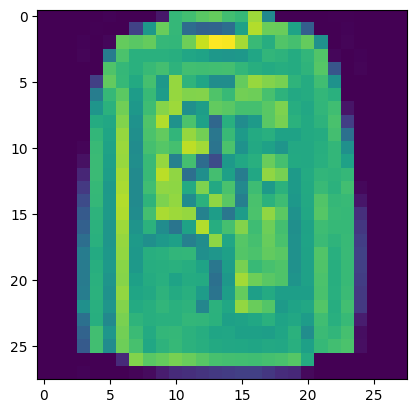

In [11]:
num = np.random.randint(0, df_fashion_train.shape[0])
plt.imshow(np.array(df_fashion_train.iloc[num,1:]).reshape(28,-1))
print(clothes[df_fashion_train.iloc[num,0]])

Shirt


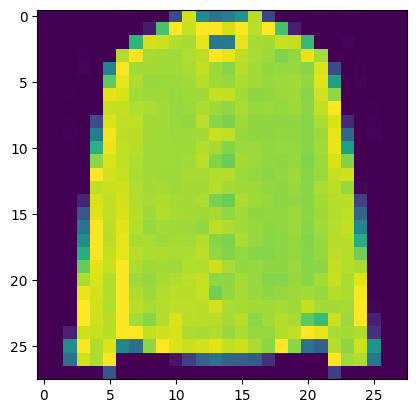

In [12]:
num = np.random.randint(0, df_fashion_test.shape[0])
plt.imshow(np.array(df_fashion_test.iloc[num,1:]).reshape(28,-1))
print(clothes[df_fashion_test.iloc[num,0]])

In [13]:
def imshw(ax,subplotsCount):
    num = np.random.randint(0, df_fashion_train.shape[0])
    ax.imshow(np.array(df_fashion_train.iloc[num,1:]).reshape(28,-1))
    yc = -(0.1 + 0.01*subplotsCount)
    ax.set_title(clothes[df_fashion_train.iloc[num,0]], fontsize = 8,y=yc)
    ax.axis('off')

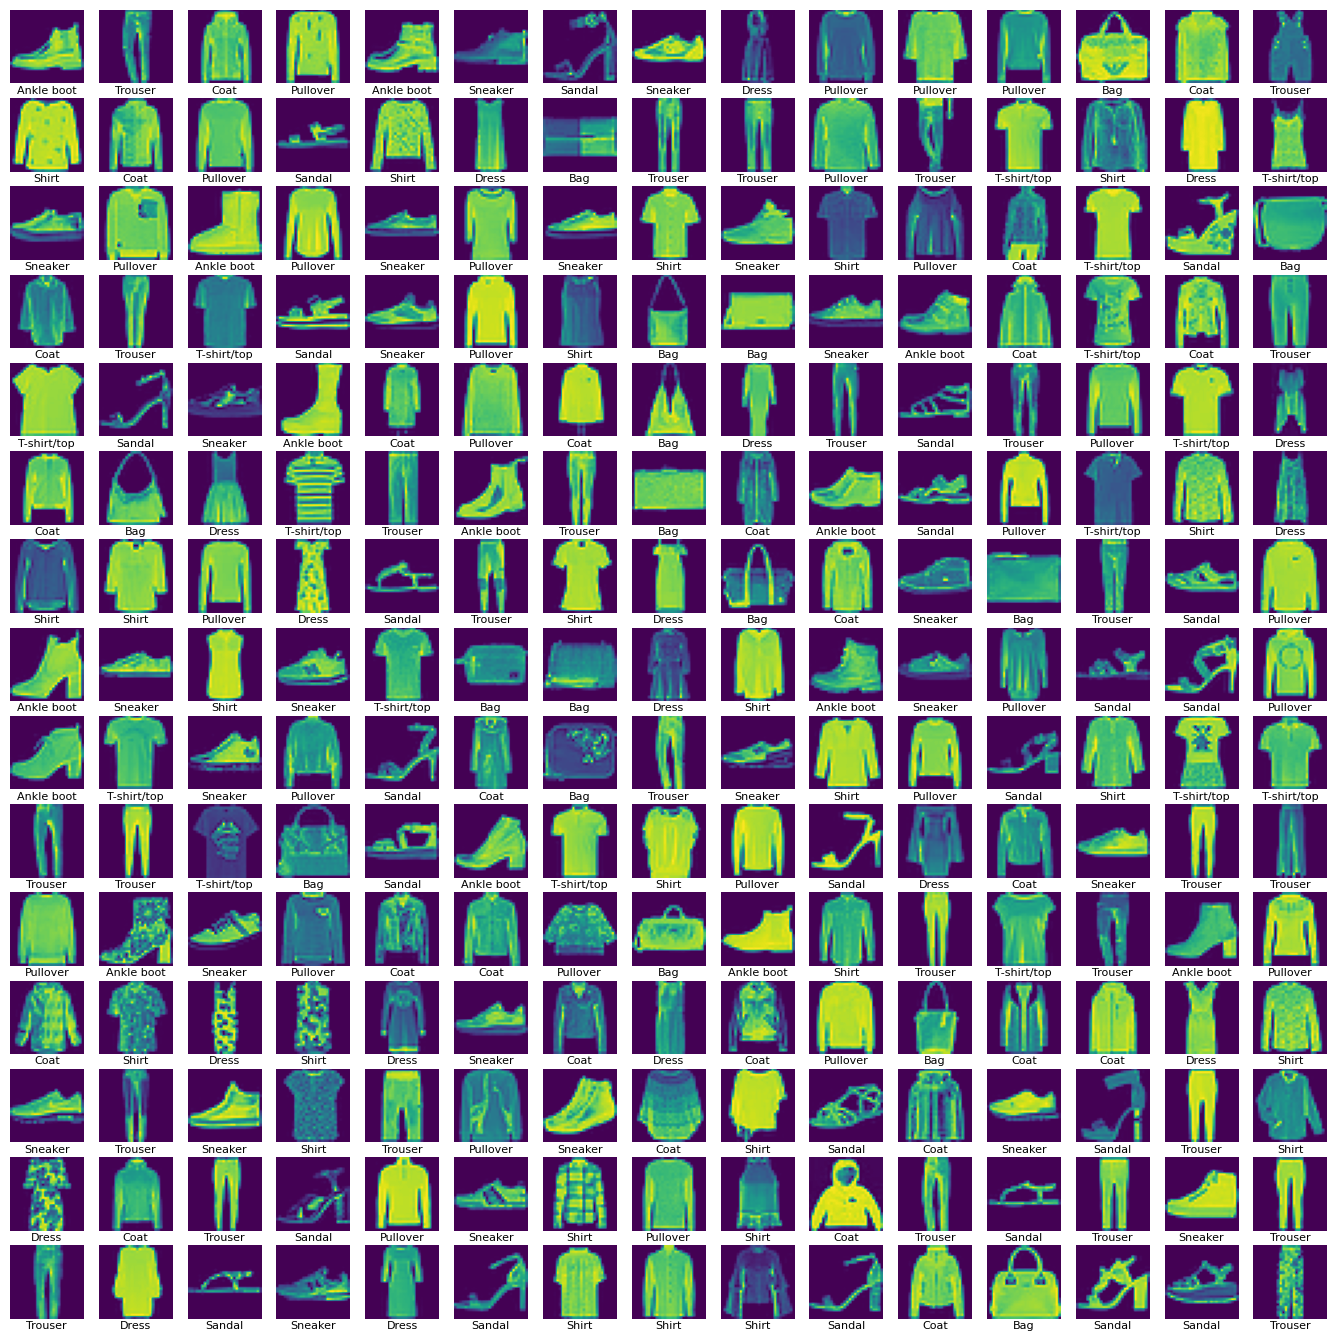

In [14]:
subs = 15
fg, axs = plt.subplots(subs, subs, figsize=(17,17))
axs = axs.ravel()
for ax in axs:
    imshw(ax, subs)

# STEP 4: SPLIT then PREPROCESSING DATA

In [15]:
x_trainNV = fashion_train[:,1:]
y_trainNV = fashion_train[:,0]

x_test = fashion_test[:,1:]
y_test = fashion_test[:,0]

x_trainNV = x_trainNV/255
x_test = x_test/255

In [16]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

# y_trainNV = to_categorical(y_trainNV, 10)
# y_test = to_categorical(y_test, 10)

x_train, x_valid, y_train, y_valid = train_test_split(x_trainNV, y_trainNV, test_size=0.2, random_state = 12345)
x_train.shape, x_valid.shape, y_train.shape, y_valid.shape

((48000, 784), (12000, 784), (48000,), (12000,))

# STEP 5: MODEL TRAINING

In [17]:
x_train = x_train.reshape(x_train.shape[0], 28,28,1)
x_test = x_test.reshape(x_test.shape[0], 28,28,1)
x_valid = x_valid.reshape(x_valid.shape[0], 28,28,1)

x_train.shape, x_valid.shape, x_test.shape

((48000, 28, 28, 1), (12000, 28, 28, 1), (10000, 28, 28, 1))

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, AveragePooling2D
from keras.optimizers import Adam
from keras.callbacks import TensorBoard
import tensorflow as tf


In [21]:
cnn_model = Sequential()

cnn_model.add(tf.keras.layers.InputLayer(input_shape = (28,28,1)))

cnn_model.add(Conv2D(10, kernel_size=(3,3), activation='relu', padding='same', strides=(1,1)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2), strides=2))

cnn_model.add(Conv2D(20, kernel_size=(3,3), activation='relu', padding='same', strides=(1,1)))
cnn_model.add(MaxPooling2D(pool_size = (2, 2), strides=2))

cnn_model.add(Flatten())

cnn_model.add(Dropout(0.5))

#cnn_model.add(Dense(units = 128, activation = 'relu'))
cnn_model.add(Dense(units = 64, activation = 'relu'))
cnn_model.add(Dense(units = 10, activation = 'softmax'))

cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

cnn_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 10)        100       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 20)        1820      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 20)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 980)               0         
                                                                 
 dropout_1 (Dropout)         (None, 980)              

In [22]:
epochs = 30

history = cnn_model.fit(x_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        validation_data = (x_valid, y_valid))


Epoch 1/30
94/94 [==============================] - 2s 10ms/step - loss: 0.9675 - accuracy: 0.6603 - val_loss: 0.5309 - val_accuracy: 0.8082
Epoch 2/30
94/94 [==============================] - 1s 10ms/step - loss: 0.5419 - accuracy: 0.8026 - val_loss: 0.4423 - val_accuracy: 0.8400
Epoch 3/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4789 - accuracy: 0.8270 - val_loss: 0.4049 - val_accuracy: 0.8572
Epoch 4/30
94/94 [==============================] - 1s 8ms/step - loss: 0.4501 - accuracy: 0.8367 - val_loss: 0.3889 - val_accuracy: 0.8594
Epoch 5/30
94/94 [==============================] - 1s 9ms/step - loss: 0.4247 - accuracy: 0.8471 - val_loss: 0.3594 - val_accuracy: 0.8709
Epoch 6/30
94/94 [==============================] - 1s 11ms/step - loss: 0.4046 - accuracy: 0.8556 - val_loss: 0.3427 - val_accuracy: 0.8781
Epoch 7/30
94/94 [==============================] - 1s 10ms/step - loss: 0.3912 - accuracy: 0.8612 - val_loss: 0.3334 - val_accuracy: 0.8804
Epoch 8/30
94/94

## LeNet - 5

In [23]:
model = Sequential([
    tf.keras.layers.InputLayer(input_shape=(28,28,1)),
    Conv2D(6, kernel_size=(5,5), activation='tanh', padding='same', strides=(1,1)),
    AveragePooling2D(pool_size = (2, 2), strides=2, padding='valid', ),

    Conv2D(16, kernel_size=(5,5), activation='tanh', padding='valid', strides=(1,1)),
    AveragePooling2D(pool_size = (2, 2), strides=2, padding='valid'),

    Flatten(),

    Dense(units=120, activation='tanh'),
    Dense(units=84, activation='tanh'),
    Dense(units=10, activation='softmax')
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         156       
                                                                 
 average_pooling2d (Average  (None, 14, 14, 6)         0         
 Pooling2D)                                                      
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 average_pooling2d_1 (Avera  (None, 5, 5, 16)          0         
 gePooling2D)                                                    
                                                                 
 flatten_2 (Flatten)         (None, 400)               0         
                                                                 
 dense_4 (Dense)             (None, 120)              

In [24]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(0.001), metrics= ['acc'])
model.fit(x_train, y_train, epochs=30)

Epoch 1/30
1500/1500 [==============================] - 9s 4ms/step - loss: 0.5423 - acc: 0.8022
Epoch 2/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.3912 - acc: 0.8580
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3471 - acc: 0.8746
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3193 - acc: 0.8833
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2963 - acc: 0.8916
Epoch 6/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2754 - acc: 0.8990
Epoch 7/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2607 - acc: 0.9037
Epoch 8/30
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2447 - acc: 0.9092
Epoch 9/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2328 - acc: 0.9135
Epoch 10/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2200 - acc: 0.9187
Epoch 11/30
1500/1500 [======

# STEP 6: MODEL Evaluation

## LeNet-5

In [25]:
evaluation = model.evaluate(x_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.4215 - acc: 0.8932
Test Accuracy : 0.893


In [26]:
y_test_hat = model.predict(x_test)
predicted_classes = np.argmax(y_test_hat, axis=1)

313/313 [==============================] - 1s 2ms/step


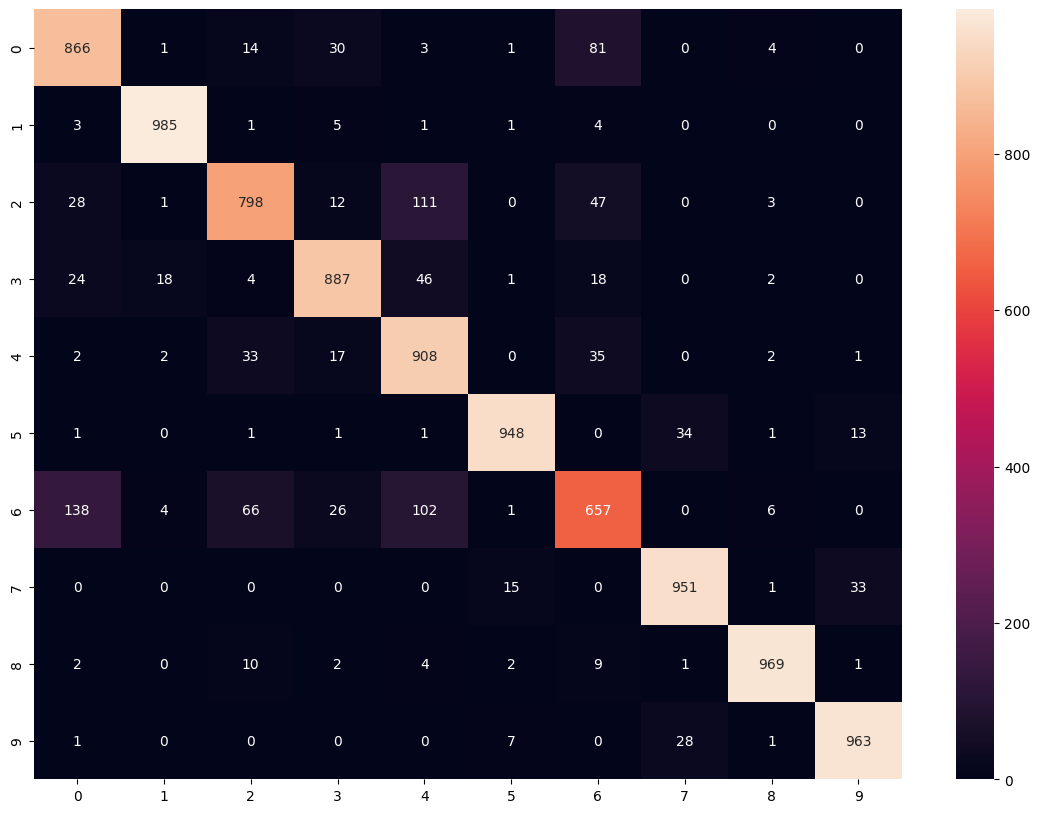

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True, fmt='g')
plt.show()

In [28]:
clothes = {
    0 : 'T-shirt/top',
    1 : 'Trouser',
    2 : 'Pullover',
    3 : 'Dress',
    4 : 'Coat',
    5 : 'Sandal',
    6 : 'Shirt',
    7 : 'Sneaker',
    8 : 'Bag',
    9 : 'Ankle boot'}

In [29]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_classes, target_names = clothes.values()))

              precision    recall  f1-score   support

 T-shirt/top       0.81      0.87      0.84      1000
     Trouser       0.97      0.98      0.98      1000
    Pullover       0.86      0.80      0.83      1000
       Dress       0.91      0.89      0.90      1000
        Coat       0.77      0.91      0.83      1000
      Sandal       0.97      0.95      0.96      1000
       Shirt       0.77      0.66      0.71      1000
     Sneaker       0.94      0.95      0.94      1000
         Bag       0.98      0.97      0.97      1000
  Ankle boot       0.95      0.96      0.96      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

